DNN MODEL

In [0]:
import numpy as np
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd

Using TensorFlow backend.


In [0]:
train_data = pd.read_csv('processed_data.csv')
data = train_data.drop('sample',1)
data = data.values
Y = data[:,-1]
X = data[:, :-1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.08, random_state = 0)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 6))

# Adding the second hidden layer
model.add(Dense(units = 64, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 64, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))


model.compile(optimizer = 'adam',loss = 'mean_absolute_error')
model.fit(X_train, y_train, batch_size = 10, epochs = 30)

In [0]:
y_predNN = model.predict(X_test)

In [0]:
metrics.mean_squared_error(y_test,y_predNN)

0.0329511820567632

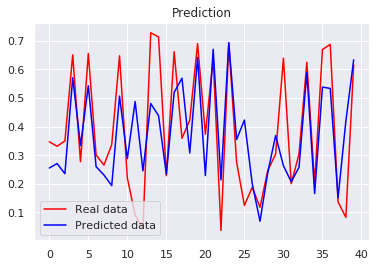

In [0]:
plt.plot(y_test[10:50], color = 'red', label = 'Real data')
plt.plot(y_predNN[10:50], color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

LINEAR REGRESSION

In [0]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
model1 = linear_model.LinearRegression()
model1.fit( X_train,y_train)

0.12736345445775055 0.11410821579128594


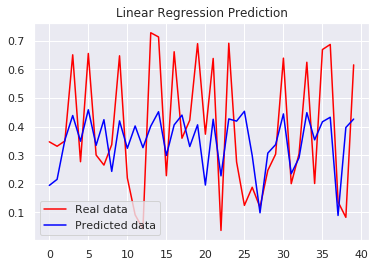

In [0]:
y_pred_linear = model1.predict(X_test)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(y_test[10:50], color = 'red', label = 'Real data')
ax.plot(y_pred_linear[10:50], color = 'blue', label = 'Predicted data')
plt.title('Linear Regression Prediction')
ax.legend()
plt.show()
fig.savefig("LR_result.png")
files.download("LR_result.png") 

In [0]:
metrics.mean_squared_error(y_test,y_pred_linear)

0.03496067092272042

SVRR


In [0]:
train_data=train_data.drop('sample',1)
data = train_data.values
Y = data[:,-1]
X = data[:, :-1]
Y = Y.reshape(-1, 1)
sc= StandardScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.08, random_state = 0)
y_test = y_test.ravel()
y_train = y_train.ravel()

In [0]:

from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


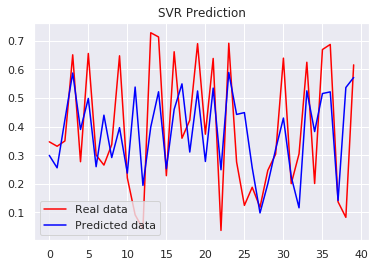

In [0]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(y_test[10:50], color = 'red', label = 'Real data')
ax.plot(y_pred[10:50], color = 'blue', label = 'Predicted data')
plt.title('SVR Prediction')
ax.legend()
plt.show()
fig.savefig("SVR_result.png")
files.download("SVR_result.png") 

In [0]:
metrics.mean_squared_error(y_test,y_pred)

0.03163767504619429